In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Theory:
## Problem Statement:
Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into 
categorie using CNN.

### The MNIST Fashion Dataset:

The MNIST Fashion dataset is an extension of the classic MNIST handwritten digit dataset. It comprises 70,000 grayscale images of various clothing items, each labeled with a category like T-shirt/top, dress, or sneaker. This dataset serves as a popular benchmark for image classification tasks due to its size, labeled nature, and relative simplici.

###  Deep Neural Networks for Image Classification:

DNNs are powerful tools for image classification. They excel at learning complex patterns from image data. Here's a breakdown of how a DNN can be used for fashion clothing classificati
#### Preprocessing:
- 
Resizing: Ensure all images have the same size (e.g., 28x28 pixels like the original dataset
- .
Normalization: Normalize pixel values (typically between 0 and 1) to improve training stabilit#### .2. Model Architectu- e:

Input Layer: The size equals the number of pixels in the image (e.g., 28x28 = 784 for grayscale im
- ges).
Convolutional Layers: These layers extract features like edges and textures from the images using learnable filters. Multiple convolutional layers can be stacked to capture increasingly complex fe
- tures.
Pooling Layers: These layers downsample the feature maps, reducing the dimensionality of data and potentially improving model robustness. Common pooling strategies include max pooling and average 
- ooling.
Flatten Layer: Transforms the output of convolutional layers into a one-dimensional vector suitable for fully-connecte
-  layers.
Fully-Connected Layers: These layers perform traditional neural network computations to learn higher-level relationships between extracted features and the final classificati
- n output.
Output Layer: Contains one neuron per clothing category with a softmax activation function. The softmax function outputs probabilities for each category, allowing the model to predict the most likely class for####  image.
3. Training and - valuation:

Training: The DNN model is trained on a portion of the MNIST Fashion dataset (training set) where each image has a corresponding clothing category label. The network learns by adjusting its internal weights to minimize the loss function (e.g., categorical cross-entropy) that measures the difference between the predicted probabilities and th
-  true labels.
Evaluation: The trained model's performance is evaluated on a separate test set unseen during training. Metrics like accuracy (percentage of correctly classified images), precision (ratio of true positives to predicted positives for each class), recall (ratio of true positives to all actual positives for each class), and F1-score (harmonic mean of precision and recall) are used to assess the model's effectiveness in classifying clothi#### categories.
4. Hyperprameter Tuning:

Finding the optimal hyperparameters (e.g., number of layers, neurons per layer, learning rate, optimizer) for your DNN is crucial for achieving good performance. Techniques like grid search or random search can be used to explore different hyperparameter combinations and identify the configuration that yields the best results on the validation set (a subset of the training data used for hyperparameter tuning).ony.s

# Basic classification: Classify images of clothing

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.0


# Import the Fashion MNIST dataset


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

# Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

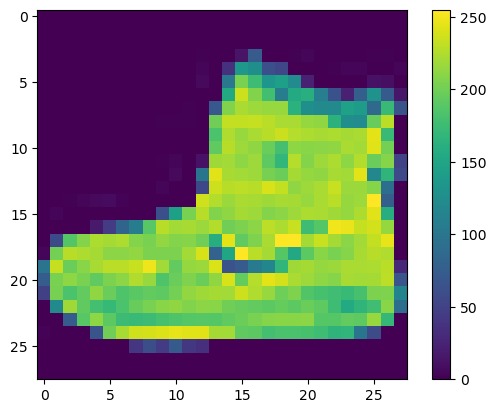

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

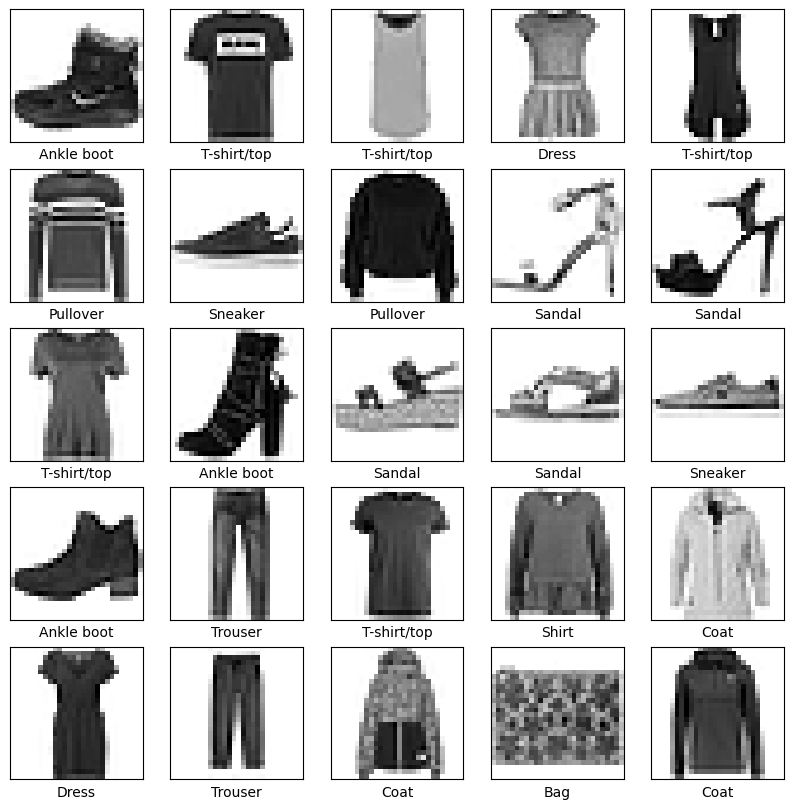

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the modelBuilding the neural network requires configuring the layers of the model, then compiling the model.


## Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5050 - accuracy: 0.8215
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3762 - accuracy: 0.8638
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3402 - accuracy: 0.8770
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3143 - accuracy: 0.8840
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2958 - accuracy: 0.8904
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2844 - accuracy: 0.8949
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2706 - accuracy: 0.9002
Epoch 8/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2595 - accuracy: 0.9043
Epoch 9/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2532 - accuracy: 0.9050
Epoch 10/30
1875/1875 [==============================] - 11s 6ms/step - l

# Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest accuracy(in %):', test_acc*100)

313/313 - 1s - loss: 0.4023 - accuracy: 0.8901 - 1s/epoch - 4ms/step

Test accuracy: 0.8901000022888184

Test accuracy(in %): 89.01000022888184


## Make predictions

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 5s 14ms/step


In [20]:
predictions[0]

array([1.1258834e-11, 9.2316599e-18, 1.6672040e-11, 9.0900717e-16,
       5.2155611e-12, 2.3029875e-07, 8.7488225e-13, 6.5056178e-05,
       1.7783398e-13, 9.9993461e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions

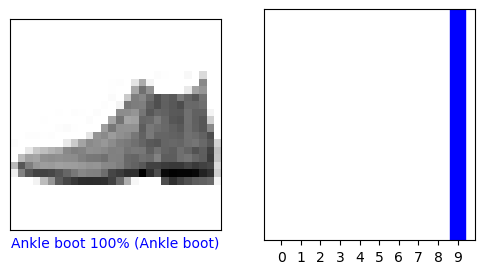

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

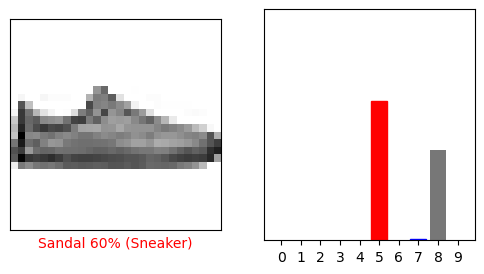

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


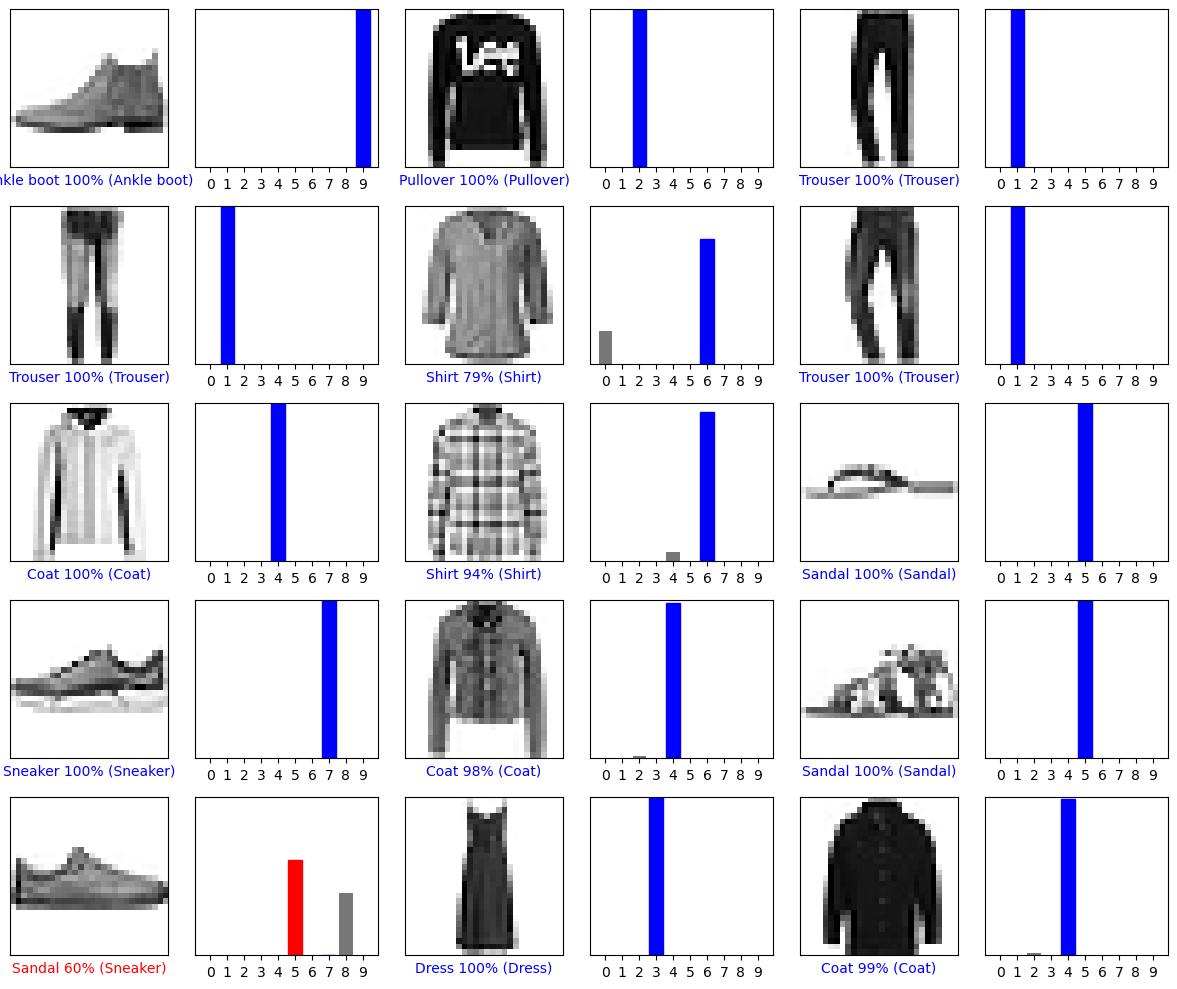

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 31ms/step
[[1.2337272e-04 4.6833682e-21 9.9938881e-01 9.3577015e-18 4.8764460e-04
  1.5155842e-15 1.3994348e-07 8.7717068e-21 2.5495708e-12 1.2902734e-17]]


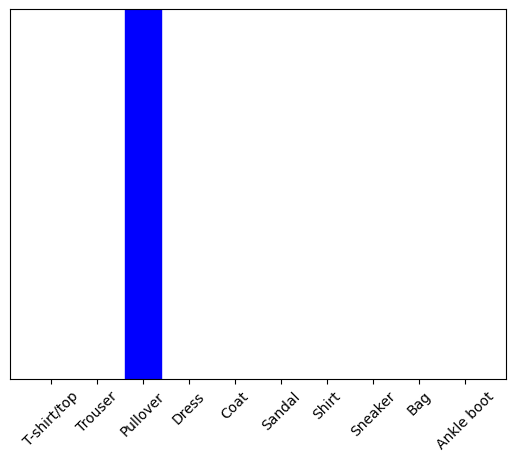

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2